In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [71]:
def generate_spike_trains_eps(length=1000, trials=1, fr_X=40, epsilon_1=0.1, epsilon_2=0.1):
    """
    Generates X and Y spike train matrices using epsilon parameters.
    
    Parameters:
    - length: Length of the spike train.
    - trials: Number of trials.
    - fr_X: Firing rate of X in Hz.
    - epsilon_1: P(Y=0 | X=0)
    - epsilon_2: P(Y=0 | X=1)
    
    Returns:
    - X: Binary matrix of shape (trials, length).
    - Y: Binary matrix of shape (trials, length).
    """
    dt = 0.001  # 1 ms time bins
    p_fire_X = fr_X * dt  # Probability of firing in each time bin
    
    # Generate X matrix
    X = np.random.rand(trials, length) < p_fire_X  # Binary matrix
    
    # Generate Y matrix based on X and epsilon parameters
    Y = np.zeros((trials, length), dtype=bool)
    for trial in range(trials):
        for t in range(length):
            if X[trial, t]:
                # If X fired, Y fires with probability (1 - epsilon_2)
                Y[trial, t] = np.random.rand() < (1 - epsilon_2)
            else:
                # If X didn't fire, Y fires with probability epsilon_1
                Y[trial, t] = np.random.rand() < (1 - epsilon_1)
    return X.astype(int), Y.astype(int)

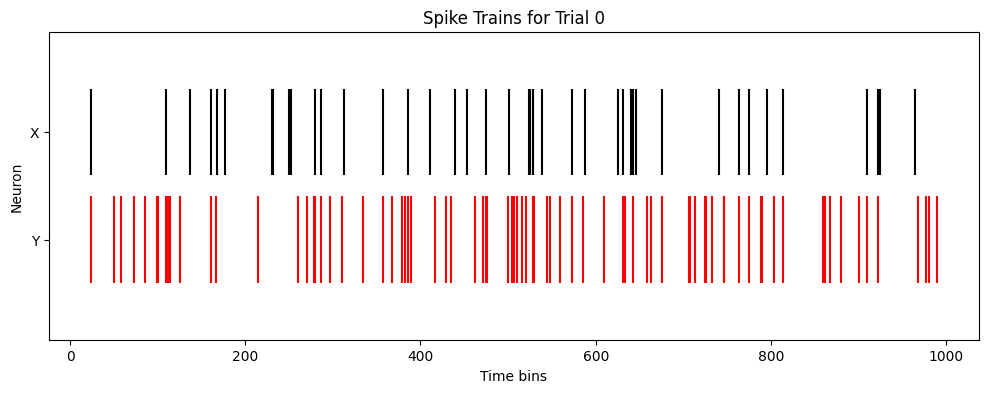

In [72]:
def plot_spike_trains(X, Y, trial=0):
    """
    Plots the spike trains for X and Y for a given trial.
    
    Parameters:
    - X: Spike train matrix for X.
    - Y: Spike train matrix for Y.
    - trial: Index of the trial to plot.
    """
    plt.figure(figsize=(12, 4))
    times = np.arange(X.shape[1])  # Time bins
    plt.eventplot([times[X[trial] == 1], times[Y[trial] == 1]],
                  lineoffsets=[1, 0], linelengths=0.8,
                  colors=['black', 'red'])
    plt.yticks([0, 1], ['Y', 'X'])
    plt.xlabel('Time bins')
    plt.ylabel('Neuron')
    plt.title('Spike Trains for Trial {}'.format(trial))
    plt.show()

epsilon_1 = 0.95  # P(Y=0 | X=0)
epsilon_2 = 0.5  # P(Y=0 | X=1)

X, Y = generate_spike_trains_eps(epsilon_1=epsilon_1, epsilon_2=epsilon_2)
plot_spike_trains(X, Y)

In [75]:
def adjust_epsilon_1(fr_X, epsilon_2, dt=0.001):
    p_X = fr_X * dt
    epsilon_1 = (1 - p_X * (1 + epsilon_2)) / (1 - p_X)
    # Ensure epsilon_2 is between 0 and 1
    epsilon_1 = np.clip(epsilon_1, 0, 1)
    return epsilon_1

Adjusted epsilon_2: 0.95
Actual firing rate of X: 39.0 Hz
Actual firing rate of Y: 46.0 Hz


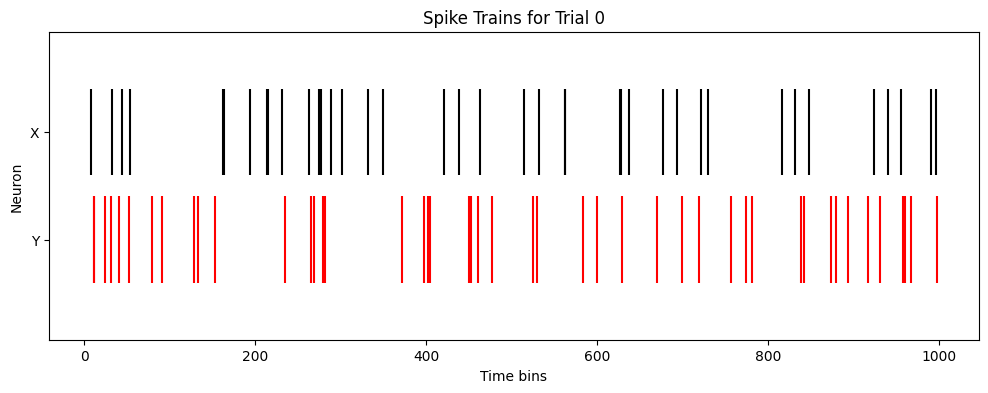

In [79]:
epsilon_2 = 0.95  # P(Y=0 | X=1), coupling strenght
fr_X = 40  # Firing rate of X in Hz
dt=0.001 # 1 ms time bins

epsilon_1 = adjust_epsilon_1(fr_X, epsilon_2)

print("Adjusted epsilon_2:", epsilon_2)

X, Y = generate_spike_trains_eps(fr_X=fr_X, epsilon_1=epsilon_1, epsilon_2=epsilon_2)

# Calculate firing rates
fr_X_actual = np.mean(X) / dt
fr_Y_actual = np.mean(Y) / dt

print("Actual firing rate of X:", fr_X_actual, "Hz")
print("Actual firing rate of Y:", fr_Y_actual, "Hz")

plot_spike_trains(X, Y)

In [80]:
def generate_spike_trains_coupl(length=1000, trials=1, fr_X=40, epsilon_2=0.1):
    """
    Generates X and Y spike train matrices using epsilon parameters.
    
    Parameters:
    - length: Length of the spike train.
    - trials: Number of trials.
    - fr_X: Firing rate of X in Hz.
    - epsilon_1: P(Y=0 | X=0)
    - epsilon_2: P(Y=0 | X=1)
    
    Returns:
    - X: Binary matrix of shape (trials, length).
    - Y: Binary matrix of shape (trials, length).
    """
    dt = 0.001  # 1 ms time bins
    p_fire_X = fr_X * dt  # Probability of firing in each time bin
    epsilon_1 = adjust_epsilon_1(fr_X, epsilon_2)
    
    # Generate X matrix
    X = np.random.rand(trials, length) < p_fire_X  # Binary matrix
    
    # Generate Y matrix based on X and epsilon parameters
    Y = np.zeros((trials, length), dtype=bool)
    for trial in range(trials):
        for t in range(length):
            if X[trial, t]:
                # If X fired, Y fires with probability (1 - epsilon_2)
                Y[trial, t] = np.random.rand() < (1 - epsilon_2)
            else:
                # If X didn't fire, Y fires with probability epsilon_1
                Y[trial, t] = np.random.rand() < (1 - epsilon_1)
    return X.astype(int), Y.astype(int)